In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(context='notebook', style='ticks', font_scale=1.5)
config = {
    "mathtext.fontset":'stix',
}

In [15]:
x = np.array([100, 1000, 10000, 100000, 1000000])

In [16]:
# get the results of the CGBP method
miss_list = []
times_list = []
for n in x:
    filelist = os.listdir(f'results/mis/n{n}_d3_gcn/')
    for f in filelist:
        if 'mis' in f:
            miss = np.load(f'results/mis/n{n}_d3_gcn/{f}')
            miss_list.append(miss)
        elif 'time' in f:
            times = np.load(f'results/mis/n{n}_d3_gcn/{f}')
            times_list.append(times)

In [17]:
# get the results of the Greedy method
gmiss_list = [[] for i in range(5)]
gtimes_list = [[] for i in range(5)]
c = 0
with open('results/mis_greedy/mis_greedy.out', 'r') as f:
    lines = f.read().split('\n')
    for line in lines:
        if line.startswith('seed'):
            l = line.split()
            mis = int(l[4])
            t = float(l[7])
            idx = c // 10
            gmiss_list[idx].append(mis)
            gtimes_list[idx].append(t)
            c += 1

In [18]:
miss_mean = np.mean(miss_list, axis=1)
miss_std = np.std(miss_list, axis=1)
gmiss_mean = np.mean(gmiss_list, axis=1)
gmiss_std = np.std(gmiss_list, axis=1)

In [19]:
pratio = 0.45537 # pratio * n is the upper bound

In [20]:
# get the approximation ratios of CGBP and Greedy
ub = x * pratio
ratio_mean = miss_mean / ub
ratio_std = miss_std / ub
gratio_mean = gmiss_mean / ub
gratio_std = gmiss_std / ub

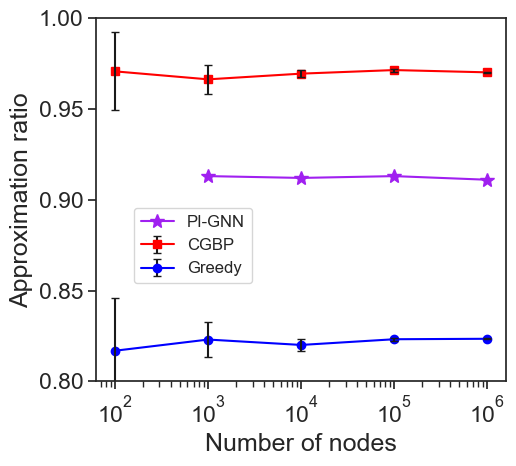

In [21]:
# plot approximation ratio vs n
red = '#FF0000'
purple = '#A020F0'
blue = '#0000FF'
fig, ax = plt.subplots(figsize=(5.5, 5))
ax.errorbar(x, ratio_mean, yerr=ratio_std, ecolor='k',capsize=3,capthick=1,fmt='s',color=red, label='CGBP',ls='-', barsabove=True)
ax.errorbar(x, gratio_mean, yerr=gratio_std, ecolor='k',capsize=3,capthick=1,fmt='o',color=blue, label='Greedy',ls='-', barsabove=True)
ax.plot(x[1:], [0.913, 0.912, 0.913, 0.911], c=purple, markersize=10, marker='*', label='PI-GNN',ls='-')
ax.legend(bbox_to_anchor=(0.4, 0.5), loc='best', fontsize=12, ncol=1, )
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_xscale('log')
ax.set_ylim(0.8, 1.0)
ax.set_yticks(np.arange(0.8, 1.01, 0.05))
plt.tight_layout()
plt.savefig('figs/mis_ratio.png')

In [22]:
times_mean = np.mean(times_list, axis=1)
times_std = np.std(times_list, axis=1)
gtimes_mean = np.mean(gtimes_list, axis=1)
gtimes_std = np.std(gtimes_list, axis=1)

In [23]:
# get the time complexity
times_log = np.log10(times_mean)
slope, intercept = np.polyfit(np.log10(x[:-1]), times_log[:-1], 1)
print(slope, intercept)
slope2, intercept2 = np.polyfit(np.log10(x[-2:]), times_log[-2:], 1)
print(slope2, intercept2)

0.02149565365921633 1.760244139878537
0.85287165979901 -2.39346840988597


In [24]:
gtimes_log = np.log10(gtimes_mean)
gslope, gintercept = np.polyfit(np.log10(x[:3]), gtimes_log[:3], 1)
print(gslope, gintercept)
gslope2, gintercept2 = np.polyfit(np.log10(x[2:]), gtimes_log[2:], 1)
print(gslope2, gintercept2)

1.5411547155552843 -6.232600757209733
2.2409784709898686 -9.000874772781266


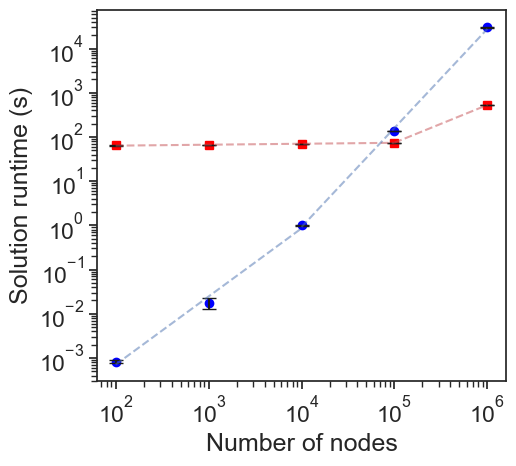

In [25]:
# plot runtime vs n
fig, ax = plt.subplots(figsize=(5.5, 5))
ax.errorbar(x, times_mean, yerr=times_std, ecolor='k',capsize=5,capthick=1,linestyle="none",marker='s', color=red, barsabove=True)
ax.plot(x[:-1], x[:-1]**slope * 10**intercept, 'r--', alpha=.5)
ax.plot(x[-2:], x[-2:]**slope2 * 10**intercept2, 'r--', alpha=.5)
ax.errorbar(x, gtimes_mean, yerr=gtimes_std, ecolor='k',capsize=5,capthick=1,linestyle="none",marker='o', color=blue, barsabove=True)
ax.plot(x[:3], x[:3]**gslope * 10**gintercept, 'b--', alpha=.5)
ax.plot(x[2:], x[2:]**gslope2 * 10**gintercept2, 'b--', alpha=.5)
ax.set_ylabel('Solution runtime (s)')
ax.set_xlabel('Number of nodes')
ax.set_xscale('log')
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('figs/mis_time.png')